In [1]:
import time
import requests
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sn
import pandas as pd

from selenium import webdriver
from matplotlib import rc
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [2]:
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-logging"])
wd = webdriver.Chrome('./chromedriver.exe',options=options)

C:\Users\0\AppData\Local\Temp\ipykernel_28840\2025538577.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  wd = webdriver.Chrome('./chromedriver.exe',options=options)


In [3]:
star_url = 'https://www.starbucks.co.kr/store/store_map.do'
wd.get(star_url)

In [6]:
# selenium v4 함수 원형 수정 됨
# 새 패키지 추가
from selenium.webdriver.common.by import By

In [4]:
# selenium v3
# wd.find_element_by_xpath('//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
# time.sleep(2)

wd.find_element('xpath','//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/header[2]/h3/a').click()
time.sleep(2)

In [7]:
wd.find_element(By.XPATH,'//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()
time.sleep(2)
wd.find_element(By.XPATH,'//*[@id="mCSB_2_container"]/ul/li[1]/a').click()

In [8]:
req = wd.page_source
soup = BeautifulSoup(req, "html.parser")
info = soup.find("div", id = "mCSB_3_container").find_all("li", class_ = 'quickResultLstCon')
len(info), info[0]

(588,
 <li class="quickResultLstCon" data-code="3762" data-hlytag="null" data-index="0" data-lat="37.501087" data-long="127.043069" data-name="역삼아레나빌딩" data-storecd="1509" style="background:#fff"> <strong data-my_siren_order_store_yn="N" data-name="역삼아레나빌딩" data-store="1509" data-yn="N">역삼아레나빌딩  </strong> <p class="result_details">서울특별시 강남구 언주로 425 (역삼동)<br/>1522-3232</p> <i class="pin_general">리저브 매장 2번</i></li>)

In [9]:
name = info[0].find("strong").text.strip()
address = info[0].find(class_="result_details").text.strip()[:-9]
place = address.split(" ")[1]

name, address, place

('역삼아레나빌딩', '서울특별시 강남구 언주로 425 (역삼동)', '강남구')

In [10]:
star_info = []
for item in info :
    name = item.find("strong").text.strip()
    address = item.find(class_="result_details").text.strip()[:-9]
    place = address.split(" ")[1]
   
    data = {
        "가게명" : name,
        "주소" : address,
        "구" : place
    }
    star_info.append(data)
len(star_info)

588

In [11]:
df_star = pd.DataFrame(star_info, columns = ['가게명', '구', '주소'])
df_star.tail()

,가게명,구,주소
583,중랑구청,중랑구,서울특별시 중랑구 신내로 72
584,사가정역,중랑구,서울특별시 중랑구 면목로 310
585,상봉역,중랑구,서울특별시 중랑구 망우로 307 (상봉동)
586,묵동,중랑구,"서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층"
587,중화역,중랑구,서울특별시 중랑구 봉화산로 35


In [12]:
gu_list = list(set(df_star["구"]))
gu_list

['광진구',
 '중랑구',
 '동대문구',
 '서초구',
 '종로구',
 '도봉구',
 '송파구',
 '마포구',
 '강남구',
 '서대문구',
 '강북구',
 '금천구',
 '강동구',
 '구로구',
 '용산구',
 '영등포구',
 '은평구',
 '동작구',
 '중구',
 '성북구',
 '관악구',
 '성동구',
 '노원구',
 '양천구',
 '강서구']

In [13]:
edi_url = "https://www.ediya.com/contents/find_store.html"
wd.get(edi_url)

In [14]:
wd.find_element('xpath','//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
wd.find_element('xpath','//*[@id="keyword"]').clear
wd.find_element('xpath','//*[@id="keyword"]').send_keys("서울 강남구")
wd.find_element('xpath','//*[@id="keyword_div"]/form/button').click()

html = wd.page_source
soup = BeautifulSoup(html, "html.parser")

info = soup.find("ul", id = "placesList").find_all("li", class_='item')

info

[]

In [15]:
edi_info = []



for gu in gu_list:
    wd.find_element(By.XPATH,'//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()
    wd.find_element(By.XPATH,'//*[@id="keyword"]').clear
    wd.find_element(By.XPATH,'//*[@id="keyword"]').send_keys("서울 " + gu)
    wd.find_element(By.XPATH,'//*[@id="keyword_div"]/form/button').click()
    
    html = wd.page_source
    soup = BeautifulSoup(html, "html.parser")
    
    info = soup.find("ul", id = "placesList").find_all("li", class_='item')
    
    for item in info:
        name = item.find("dt").text
        address = item.find("dd").text.strip()
        place = address.split(" ")[1]
        

        data = {
            "가게명" : name,
            "구" : place,
            "주소" : address,
        }
        edi_info.append(data)
 
len(edi_info)

718

In [16]:
df_edi = pd.DataFrame(edi_info)
df_edi.tail()

,가게명,구,주소
713,신정서부점,양천구,서울 양천구 신정로11길 50-15 (신정동)
714,신정역점,양천구,서울 양천구 오목로 155 (신정동)
715,양천구청점,양천구,서울 양천구 목동동로 63 (신정동)
716,오목교대학학원점,양천구,서울 양천구 오목로 319 (목동)
717,오목교역점,양천구,서울 양천구 신목로 102 (목동)


In [17]:
star_count = []
for item in gu_list:
    n = len(df_star.loc[df_star['구']==item])
    data = {
        "구" : item,
        "스벅 매장수" : n
    }
    star_count.append(data)
df_star_count = pd.DataFrame(star_count)
df_star_count

,구,스벅 매장수
0,광진구,19
1,중랑구,7
2,동대문구,9
3,서초구,48
4,종로구,39
5,도봉구,4
6,송파구,34
7,마포구,35
8,강남구,89
9,서대문구,21


In [18]:
edi_count = []
for item in gu_list:
    n = len(df_edi.loc[df_edi['구']==item])
    data = {
        "구" : item,
        "이디야 매장수" : n
    }
    edi_count.append(data)
df_edi_count = pd.DataFrame(edi_count)
df_edi_count

,구,이디야 매장수
0,광진구,24
1,중랑구,27
2,동대문구,25
3,서초구,29
4,종로구,31
5,도봉구,24
6,송파구,39
7,마포구,38
8,강남구,88
9,서대문구,21


In [19]:
sum_data = pd.merge(df_edi_count, df_star_count)
sum_data["매장 수 차이"] = sum_data["이디야 매장수"] - sum_data["스벅 매장수"]
sum_data

,구,이디야 매장수,스벅 매장수,매장 수 차이
0,광진구,24,19,5
1,중랑구,27,7,20
2,동대문구,25,9,16
3,서초구,29,48,-19
4,종로구,31,39,-8
5,도봉구,24,4,20
6,송파구,39,34,5
7,마포구,38,35,3
8,강남구,88,89,-1
9,서대문구,21,21,0


In [20]:
from matplotlib import font_manager,rc
font_path = "C:/Windows/Fonts/H2GTRM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
plt.rcParams['axes.unicode_minus'] = False
rc('font',family=font)

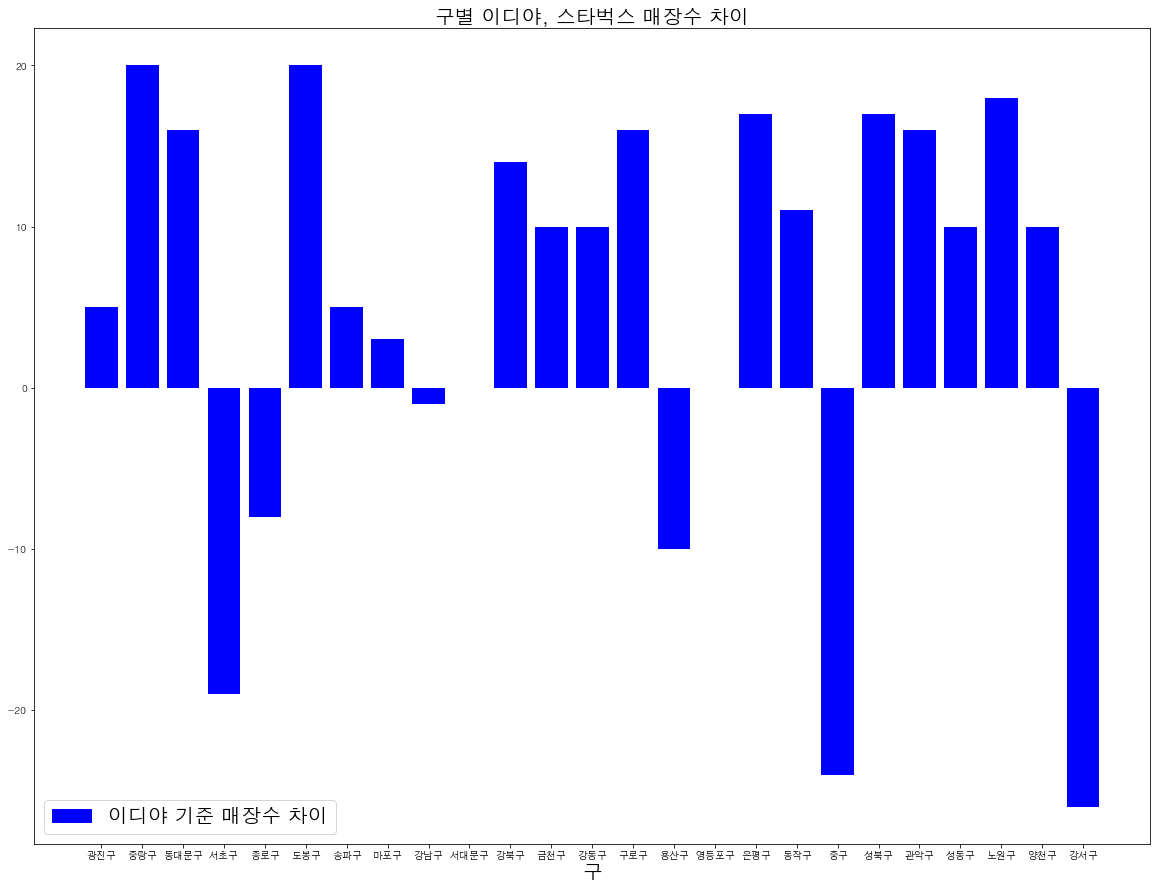

In [21]:
a = sum_data["매장 수 차이"]
y = "ediya"

plt.figure(figsize=(20,15))
plt.bar(sum_data["구"], a, color = 'b', label ="이디야 기준 매장수 차이" )
plt.title("구별 이디야, 스타벅스 매장수 차이", fontsize = 20)
plt.xlabel("구", fontsize = 20)
plt.legend(loc ='lower left', fontsize = 20)
plt.show()
